# Boostrap implementation to evaluate the CI in the $R^2$ metrics to evaluate the goodness of a fit

Bootstrapping helps estimate the uncertainty of non-standard estimators.

We consider the $R^2$ statistic associated with a regression, which can be derived when we run a simple least squares regression.

We want to estimate via bootstrapping the 95% CI for $R^2$.

The technique used in this example involves bootstrapping the predictor and response values, and assumes that the predictor variable is random.


## Dataset for the regression model

We read the data in the file "data_for_regression.csv" as a DataFrame df with a dependent variable $y$ and two independent variables $x_1$ and $x_2$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_file = "../Datasets/data_for_regression.csv"

In [4]:
df = pd.read_csv(dataset_file)
df.head()

,Data,x1,x2,y
0,1,2015,643.09,234314.144
1,2,2009,656.22,228581.528
2,3,2018,487.29,281626.336
3,4,2015,1504.75,401255.608
4,5,2009,1275.46,458674.256


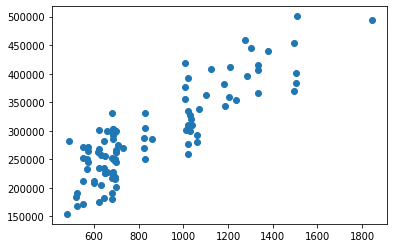

In [5]:
plt.scatter(df.x2,df.y)

We can fit a linear regression model with `linear_model` of `scikit-learn`  ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

$Y = C_1x_1 + C_2x_2 + Intercept$

In [12]:
# Importing the linear_model module from scikit-learn
from sklearn import linear_model

# Creating a linear regression model object
regr = linear_model.LinearRegression()

# df[['x1', 'x2']] selects the features (independent variables) 'x1' and 'x2'
# df.y is the target variable (dependent variable) to be predicted
regr.fit(df[['x1', 'x2']], df.y)

In [21]:
print("Coefficients:", regr.coef_ , regr.intercept_)

Coefficients: [3040.35598079  228.35242603] -6021794.754348301


- The code imports the necessary linear_model module from scikit-learn.
- It creates a linear regression model using the `LinearRegression` class.
- The model is then trained (fitted) using the data from the DataFrame `df`, where 'x1' and 'x2' are the features, and 'y' is the target variable.

We can obtain the coefficient of determination $R^2$ with `regr.score(X, y)`.

$R^2=1$ is a perfect prediction.

In [23]:
# Printing the coefficient of determination (R²) for the trained linear regression model
# The score method is used to calculate the R² on the same data used for training
# The result is formatted to display two decimal places in the output
print("Coefficient of determination: %.2f" % regr.score(df[['x1', 'x2']], df.y))

Coefficient of determination: 0.78


- The `score` method of the linear regression model (`regr`) is used to calculate the coefficient of determination (R²) on the input data.
- The result is then printed to the console with a format that displays it with two decimal places.

## Use bootstrapping to calculate the 95% CI for $R^2$.

The following step can be implemented to obtain the CI for $R^2$ via bootstrapping:

* Draw a bootstrap sample from the original dataset using the `sample()` method of `pandas`.  The number of rows should be the same as that of the original DataFrame.
* Fit a regression similar to `regr = linear_model.LinearRegression()` and extract the $R^2$ statistic using the parameter `regr.score`.
* Append the  $R^2$ to the list `rsquared_boot`.
* Calculate 95% CI for `rsquared_boot` as `R2_95_ci` using `np.percentile()`.

We create a bootstrap sample  with replacement of R$^2$ fit parameters, by running n_boot = 1000 fits:

In [37]:
# Creating a linear regression model object
regr = linear_model.LinearRegression()

# Initializing empty lists to store R² values, coefficients, and the number of bootstrap iterations
R2_boot, n_boots = [], 1000

# Looping through the specified number of bootstrap iterations
for i in range(n_boots):
    # Creating a bootstrap sample with replacement by randomly selecting rows from the DataFrame
    # frac=1 means sampling all rows, and replace=True enables sampling with replacement
    bootstrap = df.sample(frac=1, replace=True)

    # Fitting the linear regression model to the bootstrap sample
    regr.fit(bootstrap[['x1', 'x2']], bootstrap.y)
    
    # Calculating and appending the R² value for the bootstrap sample
    R2_boot.append(regr.score(bootstrap[['x1', 'x2']], bootstrap.y))

- The code initializes a linear regression model (`regr`).
- It sets the number of bootstrap iterations to 1000.
- In each iteration, it creates a bootstrap sample by randomly selecting rows from the DataFrame (`df`) with replacement.
- The linear regression model is fitted to the bootstrap sample, and the R² value is calculated and appended to the `R2_boot` list.

This code will estimate the distribution of the coefficient of determination (R²) for the linear regression model through bootstrap resampling.

Plot the distribution of `rsquared_boot`

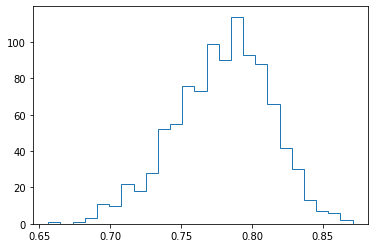

In [34]:
_ = plt.hist(R2_boot, 25, histtype='step')

Calculate 95% CI of $R^2$, with `np.percentile`

In [38]:
# Calculating the 95% confidence interval for R² using percentiles from the bootstrapped R² values
R2_95_ci = np.percentile(R2_boot, [2.5, 97.5])

# Printing the result
print("R Squared 95% CI = {}".format(R2_95_ci))

R Squared 95% CI = [0.71214485 0.83723574]


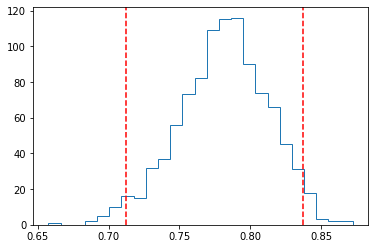

In [39]:
# Importing the matplotlib.pyplot library
import matplotlib.pyplot as plt

# Creating a histogram of the bootstrapped R² values with 25 bins and 'step' type
_ = plt.hist(R2_boot, 25, histtype='step')

# Adding vertical dashed lines to represent the 95% confidence interval
_ = plt.axvline(R2_95_ci[0], linestyle='--', color='red')  # Lower bound of the 95% CI
_ = plt.axvline(R2_95_ci[1], linestyle='--', color='red')  # Upper bound of the 95% CI

# Displaying the plot
plt.show()

- The code uses `matplotlib.pyplot` to create a histogram of the bootstrapped R² values with 25 bins and a 'step' type.
- Two vertical dashed lines are added using `axvline` to represent the lower and upper bounds of the 95% confidence interval in red.
- The `plt.show()` command is used to display the plot.

This visualization allows you to see the distribution of the bootstrapped R² values and visually inspect the 95% confidence interval. The red dashed lines indicate the range within which you have 95% confidence that the true R² value lies.